In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

### Uppgift 2

#### (b)

In [20]:
# since U~U(0,1) if and only 1-U~U(0,1) we replace 1-u with u:
def inv_F(u):
    
    return 2.5 / u**(1/4)

# pdf for pareto(2.5, 4)
def pareto_pdf(x):
    
    if x < 2.5:
        val = 0
    else:
        val = 4 * 2.5**4 * x**(-(4 + 1))
    
    return val

pareto = np.vectorize(pareto_pdf)

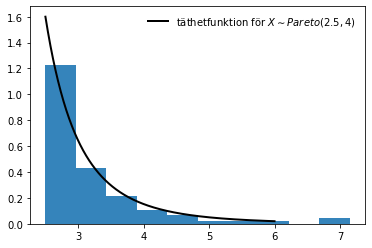

In [23]:
# generate 100 draws from a U(0,1) distribution
U_samps = stats.uniform.rvs(size = 100)

# apply the inverse CDF to each sample to get a sample of size 100 from Pareto(2.5, 4)
P_samps = np.array([inv_F(u) for u in U_samps])

# Plot histogram with pareto pdf:
fig, ax = plt.subplots(1, 1)
x = np.linspace(2.5, 6, 1000)
ax.plot(x, pareto(x), 'k-', lw=2, label='täthetfunktion för $X\sim{Pareto}(2.5, 4)$')
# ax.plot(x, pdf_est(x), lw=2, label='pdf_est')

ax.hist(P_samps, density=True, histtype='stepfilled', alpha=0.9)
ax.legend(loc='best', frameon=False)
plt.show()

In [27]:
# Compute the sample mean
samp_mean = np.mean(P_samps)

print(f"{samp_mean=}")

samp_mean=3.1730246809743567


#### (c)

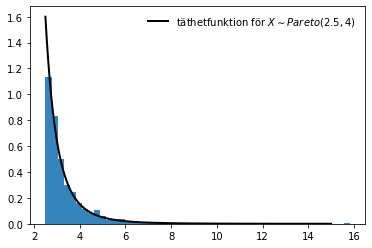

In [35]:
# We do the same for 1000 draws:
U_samps = stats.uniform.rvs(size = 1000)

# apply the inverse CDF to each sample to get a sample of size 100 from Pareto(2.5, 4)
P_samps = np.array([inv_F(u) for u in U_samps])

# Plot histogram with pareto pdf:
fig, ax = plt.subplots(1, 1)
x = np.linspace(2.5, 15, 1000)
ax.plot(x, pareto(x), 'k-', lw=2, label='täthetfunktion för $X\sim{Pareto}(2.5, 4)$')

# increase number of bins to get better looking plot
ax.hist(P_samps, density=True, histtype='stepfilled', alpha=0.9, bins = 50)
ax.legend(loc='best', frameon=False)
plt.show()

In [36]:
# Compute the sample mean
samp_mean = np.mean(P_samps)

print(f"{samp_mean=}")

samp_mean=3.3947647316110134


### Uppgift 4

#### (a)

In [38]:
# CDF of Neg-Bin(2, 1/3):
def negBin_F(r, p, x):
    
    return sum([scipy.special.binom(r + j - 1, j)*p**r*(1-p)**j for j in range(x+1)])

In [39]:
negBin_F(2, 1/3, 0)

0.1111111111111111

In [50]:
def neg_bin_samp(r, p, n):
     
    U_samps = stats.uniform.rvs(size = n)
    X_samps = []
    
    for u in U_samps:
        t = 0 
        x = 0
        
        while t == 0:
            if u < negBin_F(r, p, x):
                t = 1
            else:
                x += 1
        
        X_samps += [x]
        
    return np.array(X_samps)

In [64]:
# We compute the sample mean of $1000$ samples of size ten from Neg-Bin(2, 1/3):
mean_samps = [np.mean(neg_bin_samp(2, 1/7, 10)) for i in range(1000)]

In [65]:
# we compute the proportion of samples in mean_samps that are less than or equal to the sample mean of the given data
sample_mean = np.mean([2, 3, 7, 8, 2, 4, 7, 5, 5, 7])
counts = 0

for s in mean_samps:
    if s <= sample_mean:
        counts += 1

est_prob = counts / 1000
print(f"{est_prob=}")

est_prob=0.003


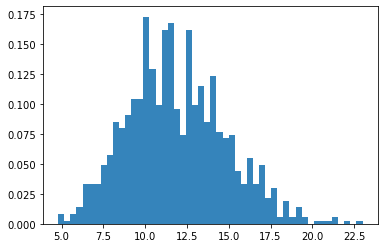

In [66]:
# Plot histogram with the data:
fig, ax = plt.subplots(1, 1)
ax.hist(mean_samps, density=True, histtype='stepfilled', alpha=0.9, bins = 50)
plt.show()

In [67]:
1 - 0.003

0.997

#### (b)

This is a large probability suggesting that the sample mean of the data (which is 5) is more extreme than one would expect from a random draw from the distribution of $\overline{T}$. Namely, we estimate that 99.7% of the distribution of $\overline{T}$ sits to the right of our sample mean.  So it is unlikely that our sample is drawn from a Neg-Bin(2, 1/3)-population. We can test with a different choice of $p$.  Such as $p = 2/7$:

In [68]:
mean_samps = [np.mean(neg_bin_samp(2, 2/7, 10)) for i in range(1000)]

sample_mean = np.mean([2, 3, 7, 8, 2, 4, 7, 5, 5, 7])
counts = 0

for s in mean_samps:
    if s <= sample_mean:
        counts += 1

est_prob = counts / 1000
print(f"{est_prob=}")

est_prob=0.579


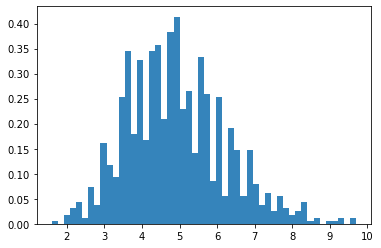

In [69]:
# Plot histogram with the data:
fig, ax = plt.subplots(1, 1)
ax.hist(mean_samps, density=True, histtype='stepfilled', alpha=0.9, bins = 50)
plt.show()

This probability is much larger and we see that our sample mean sits nicely in the middle of the histogram of our generated samples.  It is doesn't seem reasonable to reject the idea that our sample is a draw from this population.

### Uppgift 7

In [93]:
#generera ett utfall från multi(n; 1/6, 1/6, 1/6, 1/6, 1/6, 1/6):
def samp_multi_1(n):
    
    utfall = []
    
    for i in range(n):
        u = stats.uniform.rvs(size=1)
        
        t = 0
        j = 0
        
        while t == 0:
            if u > (j / 6):
                j += 1
            else:
                utfall += [j]
                t = 1
    
    return utfall
                

In [96]:
#generera ett stickprov av storlek n från multi(4; 1/6, 1/6, 1/6, 1/6, 1/6, 1/6):
def samp_multi_4(n):
    
    samp = []
    
    for i in range(n):
        samp += [samp_multi_1(4)]
        
    return samp

In [138]:
stickprov = samp_multi_4(1000)

In [139]:
# count the number of times each value appears in each outcome
def count_vec(samp):
    
    counts = np.zeros((len(samp), 6))
    
    for j in range(len(samp)):
        for i in range(1,7):
            counts[j, i - 1] = samp[j].count(i)
    
    return counts

In [140]:
samp_counts = count_vec(stickprov)

In [141]:
# compute the requested sample means:
samp_mean_1 = np.mean(samp_counts[:,0])
samp_mean_2 = np.mean(samp_counts[:,1])
samp_mean_3 = np.mean(samp_counts[:,2])
samp_mean_4 = np.mean(samp_counts[:,3])
samp_mean_5 = np.mean(samp_counts[:,4])
samp_mean_6 = np.mean(samp_counts[:,5])

print(f'{samp_mean_1=}')
print(f'{samp_mean_2=}')
print(f'{samp_mean_3=}')
print(f'{samp_mean_4=}')
print(f'{samp_mean_5=}')
print(f'{samp_mean_6=}')

samp_mean_1=0.664
samp_mean_2=0.652
samp_mean_3=0.679
samp_mean_4=0.629
samp_mean_5=0.662
samp_mean_6=0.714


The expectation for each $X_i$ is 4*(1/6) = 2/3, which the data supports.

### Uppgift 10

#### (b)

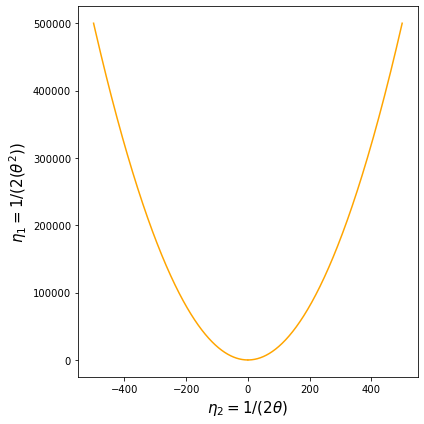

In [174]:
# The embedding of the parameter space $-\infty < θ < \infty$ into the two-dimensional space 
# of the natural parameters for $a = 1$:
plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True

N = 100000
t = np.linspace(0.001, 1, N)
θ = t
y, x = 1/(2*(θ**2)), 1/(2*θ)

z = np.linspace(-1, -0.001, N)
θ = z
y2, x2 = 1/(2*(θ**2)), 1/(2*θ)

fig, ax = plt.subplots()
ax.plot(x, y, color='orange')
ax.plot(x2, y2, color='orange')



plt.ylabel('$η_1 = 1/(2(θ^2))$', fontsize=15)
plt.xlabel('$η_2 = 1/(2θ)$', fontsize=15)

plt.savefig("curved_exp_fam_upp_10_b.pdf", bbox_inches='tight')

plt.show()